In [1]:
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
tf.enable_eager_execution()
tf.set_random_seed(1997)
from experiment import Experiment
from network import FeedforwardNet

C:\Users\Merdo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Initialization

In [2]:
data = tf.keras.datasets.mnist.load_data()
FLAGS = tf.flags.FLAGS
tf.flags.DEFINE_integer("epochs", 10, "number of epochs")
tf.flags.DEFINE_integer("batch_size", 64, "batch_size")
tf.flags.DEFINE_string('f', '', 'kernel') #to prevent unknown flag error.

# Training phase of the network

In [3]:
dense_model = FeedforwardNet(data, FLAGS)
dense_model.build_graph()
accuracies = dense_model.train()

100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:21<00:00, 45.11it/s]


Epoch:  0 Accuracy:  0.9393157


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:21<00:00, 43.59it/s]


Epoch:  1 Accuracy:  0.97193164


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:21<00:00, 43.85it/s]


Epoch:  2 Accuracy:  0.9805104


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:22<00:00, 42.59it/s]


Epoch:  3 Accuracy:  0.98494136


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:21<00:00, 43.89it/s]


Epoch:  4 Accuracy:  0.9870402


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:21<00:00, 44.22it/s]


Epoch:  5 Accuracy:  0.98897254


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:22<00:00, 42.43it/s]


Epoch:  6 Accuracy:  0.9904218


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:22<00:00, 42.01it/s]


Epoch:  7 Accuracy:  0.99163777


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:22<00:00, 42.59it/s]


Epoch:  8 Accuracy:  0.99305373


100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:22<00:00, 42.46it/s]


Epoch:  9 Accuracy:  0.9926539


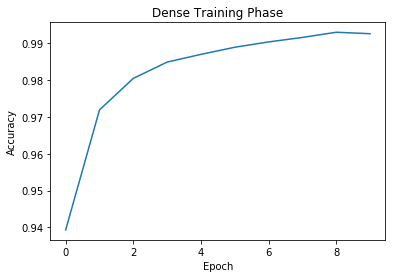

Test Accuracy:  0.97969747


In [4]:
plt.plot(accuracies)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Dense Training Phase")
plt.show()
prune_list = [0, 25, 50, 60, 70, 80, 90, 95, 97, 99]
experiments = Experiment(dense_model.network, dense_model.test_data, prune_list)
test_dense = experiments.tester()
print("Test Accuracy: ", test_dense)

# Pruning Experiments

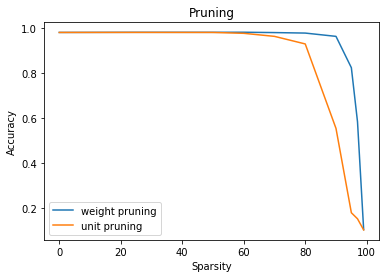

In [5]:
results_weight = experiments.prune_test("weight")
results_unit = experiments.prune_test("unit")
ax = plt.axes()
plt.plot(prune_list, results_weight, label="weight pruning")
plt.plot(prune_list, results_unit, label = "unit pruning")
plt.ylabel("Accuracy")
plt.xlabel("Sparsity")
plt.title("Pruning")
ax.legend()
plt.show()

# Interpretation

First of all, we notice that using either of the methods, we can get rid of more than 50% of the weights and a huge computational burden almost without hurting the performance of the algorithm. Regardless of the pruning approach, it can be said that in a large network a small subset of parameters are responsible for explaining the most of the variance in the data and it would make the model generalize better, less prone to overfitting and more efficient to use a pruning approach. 

It was found out that we can get rid of a higher burden using weight pruning. This is intuitive, by using individual weights we can more easily target the less important parameters. Less importance is in the sense that those parameters are making the smallest contribution to the prediction. As pointed out in the Optimal Brain Damage paper by Le Cun, the error function is quadratic in terms of small changes in weight parameters. Hence, removing a small magnitude weight from the network could only cause a very small change in the error function.

As mentioned in the Pruned and Structurally Sparse Neural Networks by Simon Alford, the human brain exhibits very high sparsity with its connections, with each neuron connected to approximately 2000 of the 86 billion total neurons on average. The same argument follows for both brain and artifical networks: We need to use the energy efficiently. Even though pruning helps us make inference more efficient, there is still a huge learning phase which we train a dense and burdensome network. To get closer to mimicking the human brain, i think the focus should be on sparsifying networks during the training phase where we can utilize further regularization approaches.

## Resources:
Yann LeCun, J. S. Denker, S. Solla, R. E. Howard, and L. D. Jackel. Optimal brain damage. In
Advances in Neural Information Processing Systems (NIPS), 1990. 
<br>
Simon Alford, Ryan Robinett, Lauren Milechin, Jeremy Kepner. Pruned and Structurally Sparse Neural Networks, arXiv:1810.00299, 2018
https://www.tensorflow.org/tutorials/keras/
<br>
https://www.tensorflow.org/api_docs/python/tf